In [29]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt, seaborn as sns

In [10]:
train = pd.read_csv("/data/daigt-v2-train-dataset/train_v2_drcat_02.csv")

In [12]:
train.head(10)

text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   
5  Cell phone use should not be legal while drivi...      0   
6  Phones and Driving\n\nDriving is a good way to...      0   
7  PHONES AND DRIVING\n\nIn this world in which w...      0   
8  People are debating whether if drivers should ...      0   
9  Texting and driving\n\nOver half of drivers in...      0   

          prompt_name           source  RDizzl3_seven  
0  Phones and driving  persuade_corpus          False  
1  Phones and driving  persuade_corpus          False  
2  Phones and driving  persuade_corpus          False  
3  Phones and driving  persuade_corpus          False  
4  Phones and driving  persuade_corpus          False  
5  Phones and driving  persuade_corpus          False  
6  Phones and driving  persuade_corpus          False  
7  Phones and driving  persuade_corpus          False  
8  Phones and driving  persuade_corpus          False  
9  Phones and driving  persuade_corpus          False

In [19]:
missing_values_count = train['text'].isna().sum()
print(missing_values_count)

0


In [18]:
duplicates_count = train.duplicated(subset='text').sum()
print(duplicates_count)

0


In [13]:
def pie_chart(df):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4)) 

    # Plotting the pie chart
    df["label"].replace({0: "Human", 1: "AI"}).value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')  

    # Plotting the bar chart
    sns.countplot(x=df["label"].replace({0: "Human", 1: "AI"}), ax=ax[1])

    plt.tight_layout()
    plt.show()
    

In [ ]:
def prompt_chart(df):
    f, ax = plt.subplots(2, 1, figsize=(8, 12))

    # Plotting the pie chart
    explode_values = [0]*len(df['prompt_name'].unique())
    df["prompt_name"].value_counts().plot.pie(explode=explode_values, autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')  

    # Plotting the bar chart
    sns.countplot(x=df["prompt_name"], ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')

    # Rotate x-axis labels
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
def prompt_label_bar_plot(df):
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x="prompt_name", y="label")
    plt.xticks(rotation=90)  
    plt.show()

In [ ]:
def prompt_label_table(df):
    return df[["prompt_name", "label"]].groupby(["prompt_name"], as_index=False).mean().sort_values(by='label', ascending=False).style.background_gradient(low=0.75,high=1)

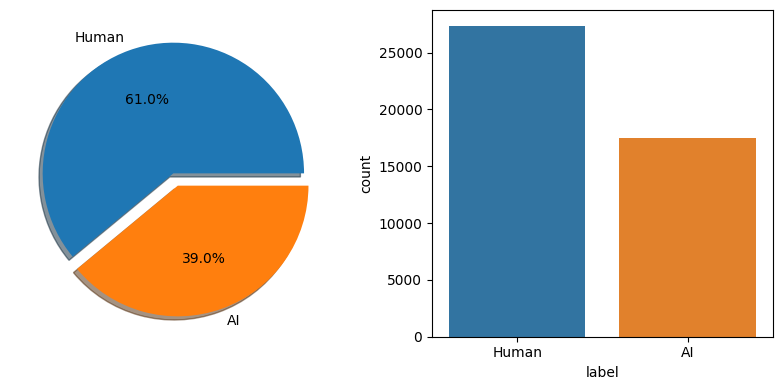

In [14]:
pie_chart(train)

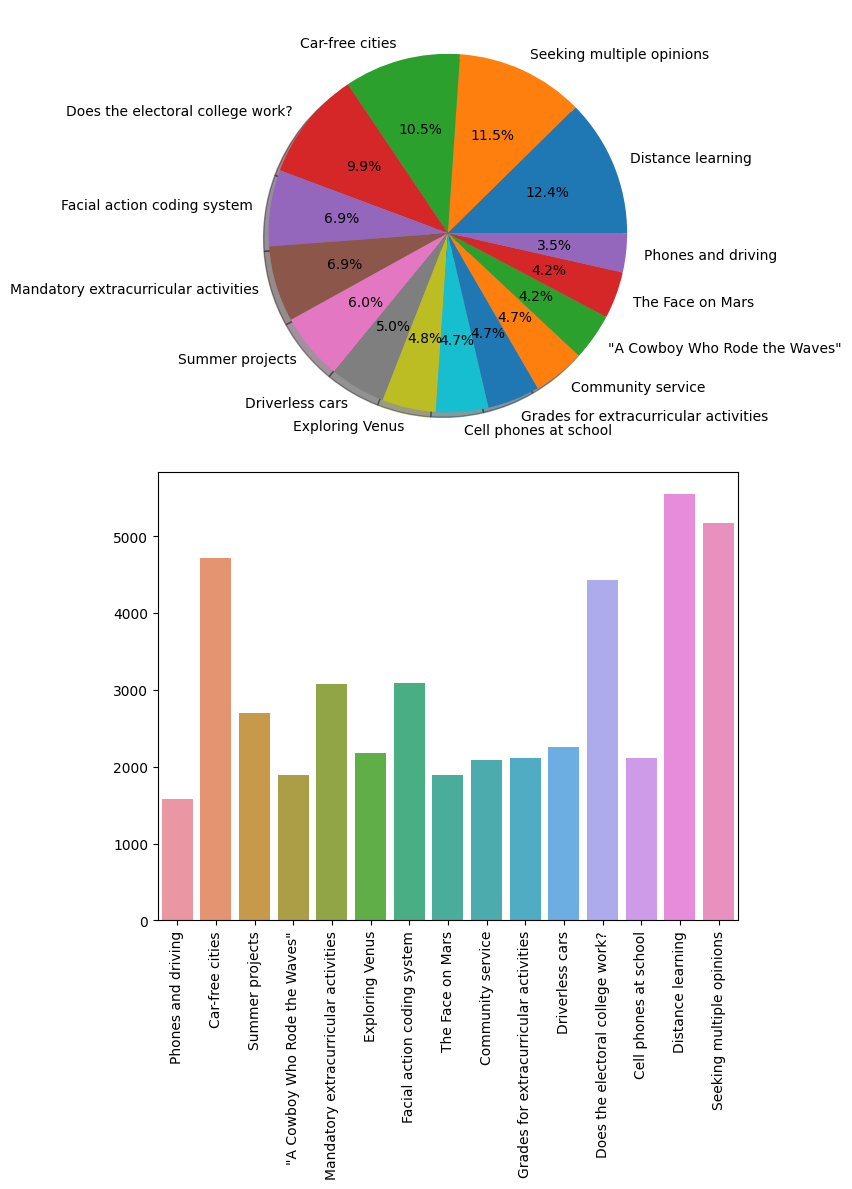

In [15]:
prompt_chart(train)

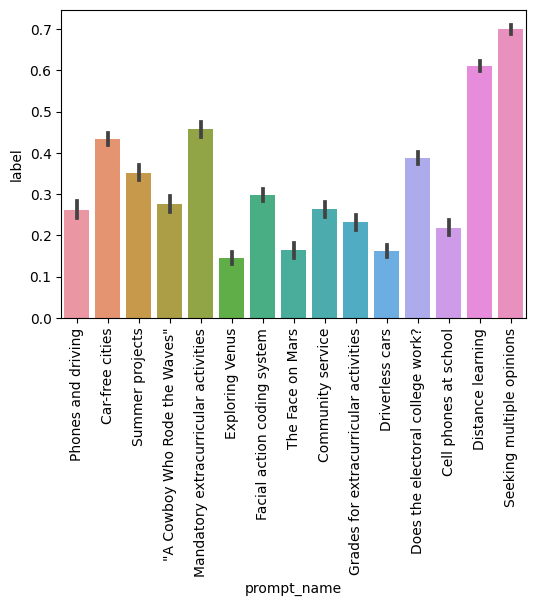

In [16]:
prompt_label_bar_plot(train)

In [17]:
prompt_label_table(train)